<a href="https://colab.research.google.com/github/kunalburgul/MLDS_Learning/blob/master/Tensorflow/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow 

There are many definations for a regression problem but tin our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow 
import tensorflow as tf
print(tf.__version__)

2.4.1


# Creating some data to view and fit 

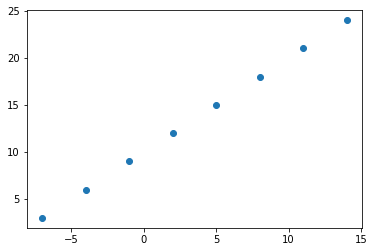

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulalize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
housr_price = tf.constant([939700])
house_info, housr_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
 # Turn out the NumPy arrays into the tensors
 X = tf.constant(X)
 y = tf.constant(y)
 X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Start with the modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how worng it is) and the optimizer  (tells our model how to improve the patterns its learnings) and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find the patterns between X & y (features and labels)

In [9]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using a Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Complie the model 
model.compile(loss=tf.keras.losses.mae,  # mae - mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD - stochastic gradient desent
              metrics=["mae"])

# 3. Fit the model 
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 535ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Check out X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [12]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve  out model by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neuraons) within each of the hidden layers, change the activation function of each layer.
2. **Compling a model** - Here we might change the aptimization function or perhaps the **;eraning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **ephocs** (leave it traning for longer) or on more data (give the model more examples to learn form). 


In [13]:
# Let's rebuild our model

# 1. Create the model 
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = "mae")

# 3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 275ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [14]:
# Remind  ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Let's see if our models prediction has imporved 
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [16]:
# Let's see if we can make another to imoprove our model

# 1. Create the model  (this time with the extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model 
model.compile(loss = "mae", 
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = "mae")

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 372ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - los

In [17]:
# Let's remind  ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# Let's try to make the prediction
model.predict([17.0])

array([[27.159163]], dtype=float32)